In [7]:
import pandas as pd

# Exemplo: se o arquivo estiver na mesma pasta do notebook
df = pd.read_csv("base.csv")


# Análise Estatística das Variáveis
Este notebook realiza uma análise exploratória inicial da base de dados de RH, com foco em entender a distribuição das variáveis, identificar outliers e analisar correlações.

In [36]:
# importando as bibliotecas necessárias

# Configurações de estilo para os gráficos
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Carregando a base de dados
df = pd.read_csv("base.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## 1. Estrutura Geral do Dataset

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura opções de exibição antes de tudo
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

if 'df' in locals():
    print(f"\n Dimensões do dataset: {df.shape[0]} registros | {df.shape[1]} colunas")

    # Visualização mais limpa dos tipos e valores nulos
    info_df = pd.DataFrame({
        'Tipo de dado': df.dtypes,
        'Valores não nulos': df.notnull().sum(),
        'Valores nulos': df.isnull().sum()
    })

    print("\n Informações das colunas:")
    display(info_df)

else:
    print("⚠️ O DataFrame 'df' não está definido.")


 Dimensões do dataset: 1470 registros | 35 colunas

 Informações das colunas:


,Tipo de dado,Valores não nulos,Valores nulos
Age,int64,1470,0
Attrition,object,1470,0
BusinessTravel,object,1470,0
DailyRate,int64,1470,0
Department,object,1470,0
DistanceFromHome,int64,1470,0
Education,int64,1470,0
EducationField,object,1470,0
EmployeeCount,int64,1470,0
EmployeeNumber,int64,1470,0


## 2. Estatísticas Descritivas das Variáveis Numéricas

In [27]:
# Seleção de variáveis numéricas
df_numeric = df.select_dtypes(include='number')
df_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


## 3. Frequência das Variáveis Categóricas

In [ ]:
import pandas as pd

# Seleção de variáveis categóricas
df_categorical = df.select_dtypes(include='object')

# Frequência das categorias (absoluta e relativa)
for col in df_categorical.columns:
    print(f"\n🔹 {col} ({df[col].nunique()} categorias únicas):")

    freq_abs = df[col].value_counts()
    freq_rel = df[col].value_counts(normalize=True).round(3) * 100

    freq_df = pd.DataFrame({
        'Frequência Absoluta': freq_abs,
        'Frequência Relativa (%)': freq_rel
    })

    display(freq_df)



🔹 Attrition (2 categorias únicas):


,Frequência Absoluta,Frequência Relativa (%)
Attrition,,
No,1233,83.9
Yes,237,16.1



🔹 BusinessTravel (3 categorias únicas):


,Frequência Absoluta,Frequência Relativa (%)
BusinessTravel,,
Travel_Rarely,1043,71.0
Travel_Frequently,277,18.8
Non-Travel,150,10.2



🔹 Department (3 categorias únicas):


,Frequência Absoluta,Frequência Relativa (%)
Department,,
Research & Development,961,65.4
Sales,446,30.3
Human Resources,63,4.3



🔹 EducationField (6 categorias únicas):


,Frequência Absoluta,Frequência Relativa (%)
EducationField,,
Life Sciences,606,41.2
Medical,464,31.6
Marketing,159,10.8
Technical Degree,132,9.0
Other,82,5.6
Human Resources,27,1.8



🔹 Gender (2 categorias únicas):


,Frequência Absoluta,Frequência Relativa (%)
Gender,,
Male,882,60.0
Female,588,40.0



🔹 JobRole (9 categorias únicas):


,Frequência Absoluta,Frequência Relativa (%)
JobRole,,
Sales Executive,326,22.2
Research Scientist,292,19.9
Laboratory Technician,259,17.6
Manufacturing Director,145,9.9
Healthcare Representative,131,8.9
Manager,102,6.9
Sales Representative,83,5.6
Research Director,80,5.4
Human Resources,52,3.5



🔹 MaritalStatus (3 categorias únicas):


,Frequência Absoluta,Frequência Relativa (%)
MaritalStatus,,
Married,673,45.8
Single,470,32.0
Divorced,327,22.2



🔹 Over18 (1 categorias únicas):


,Frequência Absoluta,Frequência Relativa (%)
Over18,,
Y,1470,100.0



🔹 OverTime (2 categorias únicas):


,Frequência Absoluta,Frequência Relativa (%)
OverTime,,
No,1054,71.7
Yes,416,28.3


## 4. Análise de Outliers com Boxplots (Exemplo: MonthlyIncome)

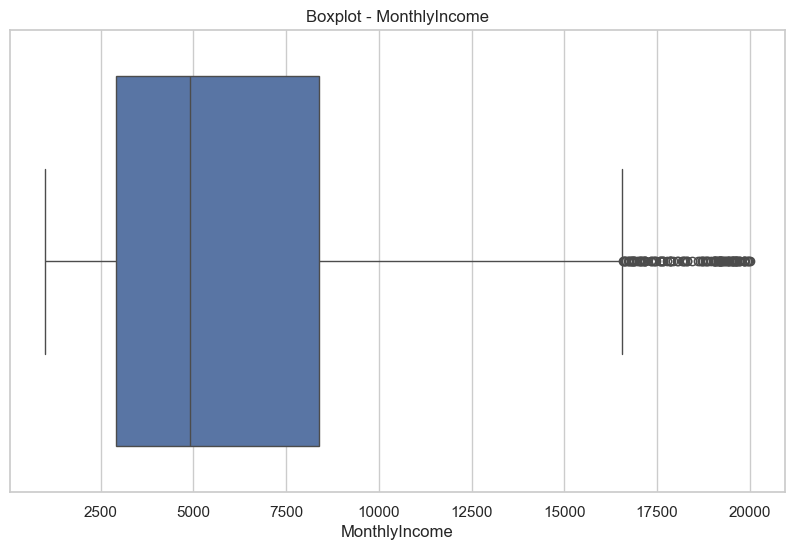

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['MonthlyIncome'])
plt.title("Boxplot - MonthlyIncome")
plt.show()

## 5. Mapa de Calor de Correlação Entre Variáveis Numéricas

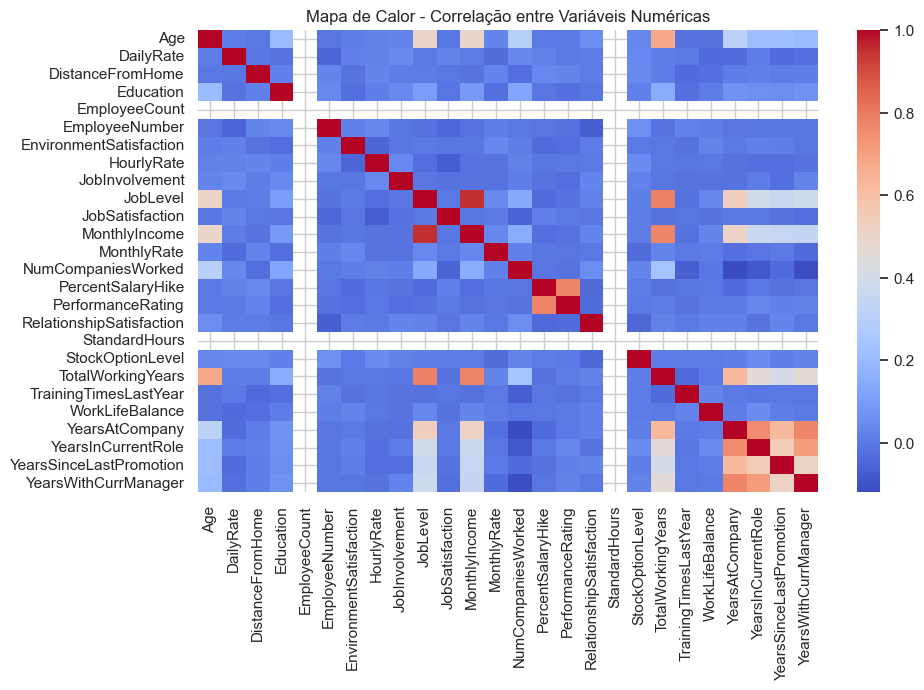

In [31]:
corr = df_numeric.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Mapa de Calor - Correlação entre Variáveis Numéricas")
plt.show()